# **KNN algorithm**

Points to Note:

- supervised
- lazy learner (in training phase,store the indexed data in memory and when inferencing use those indices to classify/regress the data point) 
- non-parametric (makes no assumptions about the data)
- simple and robust

Algorithm:

- Just store the train dataset in training phase
- During inference find out distance between given point and every data point in train set
- sort them and pick top k datapoints (k-nearest neighbours)
- Find mode of the negighbours
- The mode of the k n n is the class of the data point being considered

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
# create dummy data in 2 dims

# 100 samples with 3 features
train_data = np.random.randn(100,2)
print('Train data sahpe: ', train_data.shape) 

# random targets for classfication
target = np.random.randint(0,2, (100))
print('Target shape: ', target.shape)

Train data sahpe:  (100, 2)
Target shape:  (100,)


In [3]:
test_data = np.random.rand(20,2)
test_targets = np.random.randint(0,2,(20,))

test_data.shape, test_targets.shape

((20, 2), (20,))

In [4]:
x1 = train_data[:,0]
x2 = train_data[:,1]

Text(0, 0.5, 'x2')

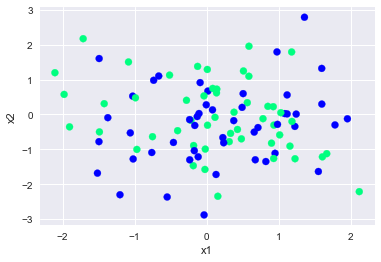

In [5]:
# let's plot to see
plt.style.use('seaborn')
plt.scatter(x1, x2, c=target, cmap='winter')
plt.xlabel('x1')
plt.ylabel('x2')

**A naive approach**

In [6]:
# O(D*N^2) implementation
class KNN:
    
    def __init__(self,k, reg=False):
        self.k = k
        self.n_samples = None
        self.target = target
        self.is_fitted = False
        self.reg = reg
    
    # fit method like sklearn to train 
    def fit(self,x,y):
        self.n_samples = x.shape[0]
        self.train_set = x
        self.target = y
        self.is_fitted = True
    
    
    def predict(self, x):
        if self.is_fitted == True:
            
            start = time.time()

            n_2pred = x.shape[0]
            dist_matrix = np.ones(shape=(self.n_samples, n_2pred))
            preds = np.zeros(n_2pred)

            #   takes more space, but to store indexes of sorted distances      
            sort_matrix = np.ones(shape=(self.n_samples, n_2pred))

            # calculate distance from each sample to training sample 
            for test_sample in range(n_2pred):
                for sample in range(self.n_samples):
                    dist_matrix[sample, test_sample] = KNN.euclid_dist(self.train_set[sample], x[test_sample])

                    sort_matrix[:,test_sample] = np.argsort(dist_matrix[:, test_sample])
            
            # make final predictions based on distances calculated..
            for test_sample in range(n_2pred):
                k_indices = sort_matrix[:self.k, test_sample]
                k_values = [self.target[int(idx)] for idx in k_indices]
                k_values = np.array(k_values)
                if self.reg:
                    pred = k_values.mean()
                    preds[test_sample] = pred
                else:
                    pred = stats.mode(k_values)
                    preds[test_sample] = pred[0][0]

            print("Completed predicting in :", time.time() - start)
            return preds.ravel()
        
        else:
        
            raise  Exception("Lol.. U didn't train the algorithm, call fit method on train data first")
    
    @staticmethod
    def euclid_dist(vec1, vec2):
        s = 0
        for a,b in zip(vec1, vec2):
            s += np.power(a-b, 2)
        return np.sqrt(s)
    

In [7]:
knn_clf = KNN(5)
knn_clf.fit(train_data, target)

In [8]:
preds = knn_clf.predict(test_data)
preds

Completed predicting in : 0.045427799224853516


array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1.])

In [11]:
# lets see how accurate these predictions are:
print(accuracy_score(test_targets, preds))   # this could be becuase the random noisy data

0.55


In [12]:
from sklearn.datasets import load_iris
iris_x, iris_y = load_iris(return_X_y=True)
iris_x.shape, iris_y.shape

((150, 4), (150,))

In [13]:
from sklearn.model_selection import train_test_split
X_tr_i, X_te_i, y_tr_i, y_te_i = train_test_split(iris_x, iris_y, test_size=0.2, random_state=42)
X_tr_i.shape, X_te_i.shape

((120, 4), (30, 4))

In [14]:
knn_clf.fit(X_tr_i, y_tr_i)

In [15]:
iris_preds = knn_clf.predict(X_te_i)
accuracy_score(y_te_i, iris_preds)

Completed predicting in : 0.13013315200805664


1.0

In [39]:
# let's find the optimal k for our classsifier

# one assumption data scientists use is optimal k can be around sqrt(train_size)
k_sqrt = int(np.sqrt(120))
print("k_value: ",k_sqrt)

# train with k 10
knn_clf = KNN(k_sqrt)
knn_clf.fit(X_tr_i, y_tr_i)
preds = knn_clf.predict(X_te_i)
accuracy_score(y_te_i, preds)

k_value:  10


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.14424967765808105


1.0

In [40]:
k_values = []
acc = []

for k in range(3, 20, 2):
    knn_clf = KNN(k)
    knn_clf.fit(X_tr_i, y_tr_i)
    preds = knn_clf.predict(X_te_i)
    score = accuracy_score(y_te_i, preds)
    k_values.append(k)
    acc.append(score)

  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.12549686431884766


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.11714863777160645


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.12592816352844238


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.11075282096862793


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.10257577896118164


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.11020207405090332


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.11436176300048828


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.11585831642150879


  0%|          | 0/30 [00:00<?, ?it/s]

Completed predicting in : 0.10863947868347168


Text(0, 0.5, 'accuracy')

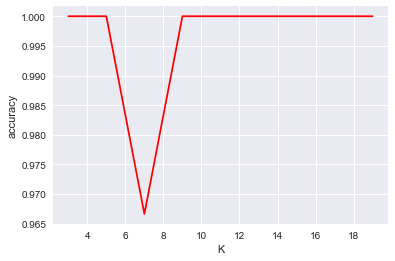

In [41]:
plt.plot(k_values, acc, c='r')
plt.xlabel('K')
plt.ylabel('accuracy')

In [42]:
#  so for any k other than 5 to 10 our algorithm can classifty with 100% accuracy

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_tr_i, y_tr_i)
preds = knn.predict(X_te_i)
print(accuracy_score(y_te_i, preds))
# sklearn accuracy same as ours....

1.0


In [17]:
#  Regression using knn

from sklearn.datasets import load_diabetes
X_d, y_d = load_diabetes(return_X_y=True)
print("Intial data shape: ",X_d.shape, y_d.shape)

X_tr_d, X_te_d, y_tr_d, y_te_d = train_test_split(X_d, y_d, test_size=0.25, random_state=42)
print('Train test size:', X_tr_d.shape, X_te_d.shape)

Intial data shape:  (442, 10) (442,)
Train test size: (331, 10) (111, 10)


In [18]:
y_d

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [19]:
from sklearn.metrics import mean_squared_error  as mse
knn_reg = KNN(5, reg=True)
knn_reg.fit(X_tr_d, y_tr_d)
d_preds = knn_reg.predict(X_te_d)
mse(y_te_d, d_preds, squared=False)

Completed predicting in : 3.2344510555267334


55.31877155619498

In [20]:
from sklearn.neighbors import KNeighborsRegressor
k_reg = KNeighborsRegressor(5)
k_reg.fit(X_tr_d, y_tr_d)
d_preds = k_reg.predict(X_te_d)
mse(y_te_d, d_preds, squared=False)

55.31877155619498

Completed predicting in : 3.401721477508545
Completed predicting in : 3.2569003105163574
Completed predicting in : 3.3725087642669678
Completed predicting in : 3.3912620544433594
Completed predicting in : 3.1625871658325195
Completed predicting in : 2.854405403137207
Completed predicting in : 3.1077826023101807
Completed predicting in : 2.946969985961914
Completed predicting in : 2.784130334854126
Completed predicting in : 3.1610753536224365
Completed predicting in : 3.406874418258667
Completed predicting in : 3.4940130710601807
Completed predicting in : 3.2258236408233643
Completed predicting in : 3.404599189758301
Completed predicting in : 3.0759897232055664
Completed predicting in : 3.0347278118133545


Text(0, 0.5, 'RMSE')

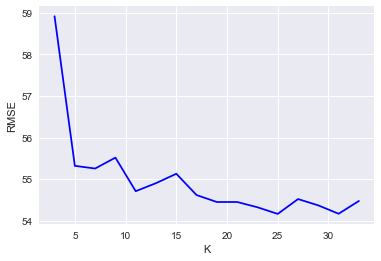

In [21]:
k_values = []
acc = []

for k in range(3, 35, 2):
    knn_clf = KNN(k, reg=True)
    knn_clf.fit(X_tr_d, y_tr_d)
    preds = knn_clf.predict(X_te_d)
    score = mse(y_te_d, preds, squared=False)
    k_values.append(k)
    acc.append(score)
    
plt.plot(k_values, acc, c='b')
plt.xlabel('K')
plt.ylabel('RMSE')

In [22]:
np.mean(y_tr_d)

154.34441087613294

In [23]:
knn_reg = KNN(20, reg=True)
knn_reg.fit(X_tr_d, y_tr_d)
d_preds = knn_reg.predict(X_te_d)
mse(y_te_d, d_preds, squared=False)

Completed predicting in : 3.4091451168060303


54.25125211325408